In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv',index_col=0)
loan_data_outputs_train = pd.read_csv('loan_data_targets_train.csv',index_col=0,header=None)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_outputs_test = pd.read_csv('loan_data_targets_test.csv',index_col=0,header=None)

In [3]:
pd.options.display.max_rows = None

In [4]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [5]:
loan_data_outputs_train.head()

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,0


In [6]:
loan_data_outputs_train.describe()

,1
count,373028.000000
mean,0.888054
std,0.315300
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
loan_data_inputs_train.shape

(373028, 323)

In [8]:
loan_data_outputs_train.shape

(373028, 1)

In [9]:
loan_data_inputs_test.shape

(93257, 323)

In [10]:
loan_data_outputs_test.shape

(93257, 1)

## Selecting the features

In [11]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

C:\Users\TAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [12]:
### Remove the dummy variable references to prevent from getting into dummy trap

In [13]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [14]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis=1)

In [15]:
inputs_train.head(5)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,NaN
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,NaN
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,NaN
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,NaN
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,NaN


In [16]:
inputs_train['mths_since_last_record:>=86'].head()

427211   NaN
206088   NaN
136020   NaN
412305   NaN
36159    NaN
Name: mths_since_last_record:>=86, dtype: float64

In [17]:
inputs_train = inputs_train.drop(['mths_since_last_record:>=86'],axis=1)

In [18]:
inputs_train.head(3)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [19]:
loan_data_outputs_train.head(10)

,1
0,
427211,1
206088,1
136020,1
412305,0
36159,0
260400,1
29626,1
117003,1
378696,1


In [20]:
loan_data_outputs_train.isna().sum()

1    0
dtype: int64

In [21]:
reg = LogisticRegression()

In [22]:
reg.fit(inputs_train,loan_data_outputs_train)

C:\Users\TAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [23]:
reg.coef_

array([[ 1.1673196 ,  0.91159641,  0.7092909 ,  0.51690723,  0.33212008,
         0.14216999,  0.08692764,  0.10177402,  0.01912996,  0.04666168,
         0.05001431,  0.05730008,  0.07417436,  0.12803031,  0.09083024,
         0.17305283,  0.23371337,  0.21053568,  0.2612607 ,  0.30947424,
         0.50037195,  0.09615706, -0.00771727,  0.30844668,  0.205042  ,
         0.21602708,  0.27087828,  0.04990461,  0.07436064,  0.10153669,
         0.12636127,  0.09714309,  0.06716362,  0.12806247,  1.03002309,
         0.82155544,  0.73747332,  0.5483558 ,  0.39875557,  0.16183319,
        -0.0629312 ,  0.84612352,  0.52712882,  0.28700105,  0.10478842,
         0.05628205,  0.04670583,  0.09264668,  0.12786517,  0.13370358,
         0.07927564,  0.05376715,  0.66605602,  0.52538898,  0.31573653,
         0.01597106, -0.09100767, -0.12170775, -0.13843962, -0.13700119,
        -0.13052753, -0.18881211,  0.12365678,  0.21630832, -0.01744106,
         0.03264954,  0.24842148,  0.04123182,  0.0

In [24]:
reg.intercept_

array([-1.23973398])

In [25]:
feature_name = inputs_train.columns.values

In [26]:
summary_table = pd.DataFrame(columns=['feature_name'],data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # moving index one row down
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head()

,feature_name,Coefficients
0,Intercept,-1.239734
1,grade:A,1.167320
2,grade:B,0.911596
3,grade:C,0.709291
4,grade:D,0.516907


In [27]:
## Measuring which independent variable is important to measure loan default
## Statistical significance of independent variable is calculated

In [28]:
### Build a Logitics Regression Model with P values

In [29]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [30]:
reg = LogisticRegression_with_p_values()

In [31]:
reg.fit(inputs_train,loan_data_outputs_train)

C:\Users\TAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
summary_table = pd.DataFrame(columns=['feature_name'],data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # moving index one row down
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table.head(10)

,feature_name,Coefficients
0,Intercept,-1.239734
1,grade:A,1.167320
2,grade:B,0.911596
3,grade:C,0.709291
4,grade:D,0.516907
5,grade:E,0.332120
6,grade:F,0.142170
7,home_ownership:OWN,0.086928
8,home_ownership:MORTGAGE,0.101774
9,addr_state:NM_VA,0.019130


In [33]:
p_values = reg.p_values

In [34]:
p_values = np.append(np.nan,np.array(p_values))

In [35]:
summary_table['p_values'] = p_values

In [36]:
summary_table.head()

,feature_name,Coefficients,p_values
0,Intercept,-1.239734,NaN
1,grade:A,1.167320,3.990477e-39
2,grade:B,0.911596,2.212587e-51
3,grade:C,0.709291,1.211268e-36
4,grade:D,0.516907,2.980550e-22


In [37]:
#summary_table.to_csv('All_Columns_Coeff_PVal.csv')

In [38]:
inputs_train = inputs_train.drop(['delinq_2yrs:0',
'delinq_2yrs:1-3',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:28-51',
'total_acc:>=52',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K'],axis=1)

In [39]:
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [40]:
reg = LogisticRegression_with_p_values()

In [41]:
reg.fit(inputs_train,loan_data_outputs_train)

C:\Users\TAN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\TAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
reg.coef_

array([[ 1.16212475,  0.89973719,  0.69831472,  0.50685039,  0.32570734,
         0.13593071,  0.08862754,  0.10220693,  0.02778959,  0.04725141,
         0.05242381,  0.06109868,  0.07616503,  0.12974813,  0.0937734 ,
         0.17677898,  0.23172355,  0.21254757,  0.2637021 ,  0.31182592,
         0.50285585,  0.09305539, -0.00814938,  0.30105977,  0.19767037,
         0.21252657,  0.26475541,  0.05050596,  0.07360178,  0.10065202,
         0.12525942,  0.09589418,  0.06683773,  0.12975068,  1.03896567,
         0.82754374,  0.74266567,  0.55325786,  0.40448645,  0.16771312,
        -0.06511719,  0.85592053,  0.53848133,  0.296402  ,  0.11114861,
         0.05610765,  0.04632528,  0.09297308,  0.13098176,  0.13882835,
         0.6953696 ,  0.55198433,  0.34238873,  0.23036501, -0.06728709,
        -0.00844644,  0.08028536,  0.15114929,  0.22097356,  0.29716801,
         0.36927104,  0.38135801,  0.46979448,  0.54115314,  0.49192101,
         0.27331527,  0.38136687,  0.39186342,  0.3

In [49]:
# Here we select a limited set of input variables in a new dataframe.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [50]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories,axis=1)

In [51]:
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,NaN
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,NaN
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,NaN
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,NaN
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,NaN


In [47]:
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
427211,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [52]:
inputs_test = inputs_test.drop(['delinq_2yrs:0',
'delinq_2yrs:1-3',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:28-51',
'total_acc:>=52',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K'],axis=1)

In [53]:
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,NaN
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,NaN
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,NaN
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,NaN
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,NaN


In [55]:
inputs_test = inputs_test.drop('mths_since_last_record:>=86',axis=1)

In [56]:
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [58]:
y_hat_test = reg.model.predict(inputs_test)

In [59]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
y_hat_test_proba = reg.model.predict_proba(inputs_test)

In [61]:
y_hat_test_proba

array([[0.07959465, 0.92040535],
       [0.16642551, 0.83357449],
       [0.11639614, 0.88360386],
       ...,
       [0.02750322, 0.97249678],
       [0.04056591, 0.95943409],
       [0.0476976 , 0.9523024 ]])

In [62]:
## First column is probability of default or probability of being a being a bad borrower
## Second column is probability of not default or probability of being a good borrower

In [63]:
## We are concerned with the probability of good borrower

In [64]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [65]:
y_hat_test_proba

array([0.92040535, 0.83357449, 0.88360386, ..., 0.97249678, 0.95943409,
       0.9523024 ])

In [66]:
loan_data_outputs_test_temp = loan_data_outputs_test.copy()

In [67]:
loan_data_outputs_test_temp.reset_index(drop=True,inplace=True)

In [85]:
df_actual_predicted_probs = pd.concat([loan_data_outputs_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)

In [86]:
df_actual_predicted_probs.head()

,1,0
0,1,0.920405
1,1,0.833574
2,1,0.883604
3,1,0.936663
4,1,0.967971


In [87]:
df_actual_predicted_probs.columns = ['Loan(Good/Bad) Actual','Probability of Good/Bad Borrower']

In [88]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [89]:
df_actual_predicted_probs.tail()

,Loan(Good/Bad) Actual,Probability of Good/Bad Borrower
115,1,0.878638
296284,1,0.963983
61777,0,0.972497
91763,1,0.959434
167512,1,0.952302


In [90]:
df_actual_predicted_probs.describe()

,Loan(Good/Bad) Actual,Probability of Good/Bad Borrower
count,93257.000000,93257.000000
mean,0.888191,0.888049
std,0.315133,0.071124
min,0.000000,0.380422
25%,1.000000,0.850210
50%,1.000000,0.903208
75%,1.000000,0.941634
max,1.000000,0.992009


## Accuracy and Area under the Curve (PD Model)

In [96]:
# cut off theshold variable tr
tr = 0.9
df_actual_predicted_probs['Loan(Good/Bad) Predicted'] = np.where(df_actual_predicted_probs['Probability of Good/Bad Borrower']>tr,1,0)

In [115]:
df_actual_predicted_probs.head()

,Loan(Good/Bad) Actual,Probability of Good/Bad Borrower,Loan(Good/Bad) Predicted
362514,1,0.920405,1
288564,1,0.833574,0
213591,1,0.883604,0
263083,1,0.936663,1
165001,1,0.967971,1


### COnfusion Matrix

In [98]:
pd.crosstab(df_actual_predicted_probs['Loan(Good/Bad) Actual'],df_actual_predicted_probs['Loan(Good/Bad) Predicted'],
           rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,7669,2758
1,37218,45612


In [99]:
pd.crosstab(df_actual_predicted_probs['Loan(Good/Bad) Actual'],df_actual_predicted_probs['Loan(Good/Bad) Predicted'],
           rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.082235,0.029574
1,0.399091,0.489100


In [100]:
## Not a good model -- change the value of the threshold

In [101]:
## Checking ROC curve

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

In [104]:
## ROC curve is a curve plotting between False positive and true positive

In [105]:
roc_curve(df_actual_predicted_probs['Loan(Good/Bad) Actual'],df_actual_predicted_probs['Loan(Good/Bad) Predicted'])

(array([0.        , 0.26450561, 1.        ]),
 array([0.        , 0.55067005, 1.        ]),
 array([2, 1, 0]))

In [106]:
## Output is three arrays-
### First array is false positive
### Second array is true positive
### Third array is threshold

In [111]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['Loan(Good/Bad) Actual'],
                               df_actual_predicted_probs['Loan(Good/Bad) Predicted'])

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'ROC Curve')

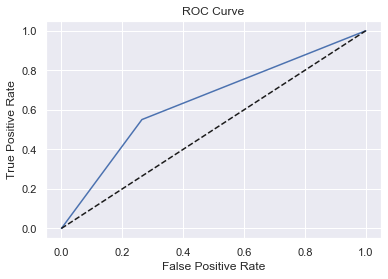

In [137]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [118]:
AUROC = roc_auc_score(df_actual_predicted_probs['Loan(Good/Bad) Actual'],
                               df_actual_predicted_probs['Loan(Good/Bad) Predicted'])
AUROC

0.6430822183249705

## Model Performance using Gini coefficient and Kolomogrov - Smirnov

In [119]:
## Gini coefficient
## measures the inequality between defaulter and non defualters in a population
## More the area of curve, better is the model

In [120]:
## Kolomogrov - Smirnov coeffecient
## Maximum difference between the cumulative distribution functions of good and bad borrowers
## More the difference, better the model

In [121]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('Loan(Good/Bad) Predicted')
# Sorts a dataframe by the values of a specific column.

In [122]:
df_actual_predicted_probs.head()

,Loan(Good/Bad) Actual,Probability of Good/Bad Borrower,Loan(Good/Bad) Predicted
110744,1,0.849016,0
41241,1,0.769538,0
387576,1,0.896160,0
15642,0,0.777636,0
425764,1,0.897939,0


In [123]:
df_actual_predicted_probs.tail()

,Loan(Good/Bad) Actual,Probability of Good/Bad Borrower,Loan(Good/Bad) Predicted
49737,1,0.913982,1
138603,1,0.909516,1
123204,1,0.901970,1
381846,0,0.917133,1
167512,1,0.952302,1


In [124]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [125]:
df_actual_predicted_probs.head()

,index,Loan(Good/Bad) Actual,Probability of Good/Bad Borrower,Loan(Good/Bad) Predicted
0,110744,1,0.849016,0
1,41241,1,0.769538,0
2,387576,1,0.896160,0
3,15642,0,0.777636,0
4,425764,1,0.897939,0


In [126]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['Loan(Good/Bad) Actual'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['Loan(Good/Bad) Actual'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [129]:
df_actual_predicted_probs.head()

,index,Loan(Good/Bad) Actual,Probability of Good/Bad Borrower,Loan(Good/Bad) Predicted,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,110744,1,0.849016,0,1,1,0
1,41241,1,0.769538,0,2,2,0
2,387576,1,0.896160,0,3,3,0
3,15642,0,0.777636,0,4,3,1
4,425764,1,0.897939,0,5,4,1


In [133]:
df_actual_predicted_probs.shape[0]

93257

In [134]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['Loan(Good/Bad) Actual'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['Loan(Good/Bad) Actual'].sum())
# We calculate the cumulative percentage of 'bad'.

In [135]:
df_actual_predicted_probs.head()

,index,Loan(Good/Bad) Actual,Probability of Good/Bad Borrower,Loan(Good/Bad) Predicted,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,110744,1,0.849016,0,1,1,0,0.000011,0.000012,0.000000
1,41241,1,0.769538,0,2,2,0,0.000021,0.000024,0.000000
2,387576,1,0.896160,0,3,3,0,0.000032,0.000036,0.000000
3,15642,0,0.777636,0,4,3,1,0.000043,0.000036,0.000096
4,425764,1,0.897939,0,5,4,1,0.000054,0.000048,0.000096


Text(0.5, 1.0, 'Gini')

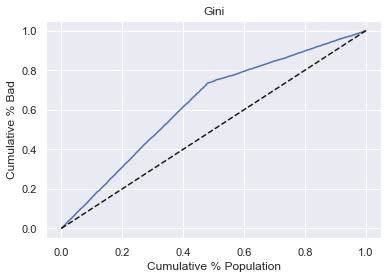

In [136]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [138]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.28616443664994096

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

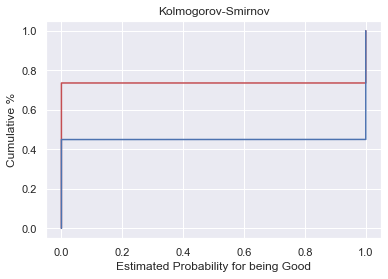

In [139]:
# Plot KS
plt.plot(df_actual_predicted_probs['Loan(Good/Bad) Predicted'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['Loan(Good/Bad) Predicted'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [140]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.286357603376972